[13:36:40] Molecule does not have explicit Hs. Consider calling AddHs()
1000it [01:49,  9.16it/s]
[13:38:29] Initializing MetalDisconnector
[13:38:29] Running MetalDisconnector
[13:38:29] Initializing Normalizer
[13:38:29] Running Normalizer
[13:38:29] Running LargestFragmentChooser
[13:38:29] Running Normalizer
[13:38:29] Running Uncharger
[13:38:29] Initializing MetalDisconnector
[13:38:29] Running MetalDisconnector
[13:38:29] Initializing Normalizer
[13:38:29] Running Normalizer
[13:38:29] Running LargestFragmentChooser
[13:38:29] Fragment: [C]1Oc2[c][c]c([C]Sc3nc4[c][c][c][c]c4s3)[c]c2O1
[13:38:29] New largest fragment: [C]1Oc2[c][c]c([C]Sc3nc4[c][c][c][c]c4s3)[c]c2O1 (20)
[13:38:29] Fragment: [F]
[13:38:29] Running Normalizer
[13:38:29] Running Uncharger


[<rdkit.Chem.rdchem.Mol object at 0x1530637d0>, <rdkit.Chem.rdchem.Mol object at 0x153063a00>]


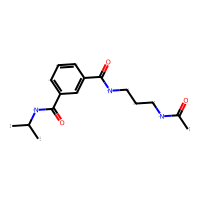

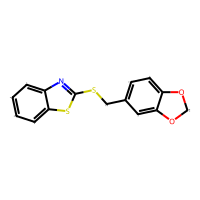

[{'mol_block': '\n     RDKit          3D\n\n 22 22  0  0  0  0  0  0  0  0999 V2000\n   -6.2433   -0.7933    2.4338 C   0  0  0  0  0  1  0  0  0  0  0  0\n   -5.2420   -1.8931    2.8690 C   0  0  0  0  0  3  0  0  0  0  0  0\n   -5.8527   -3.2653    3.2464 C   0  0  0  0  0  1  0  0  0  0  0  0\n   -3.9044   -1.7991    2.7452 N   0  0  0  0  0  2  0  0  0  0  0  0\n   -3.4838   -1.5302    1.4994 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -4.0981   -1.7480    0.4557 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -2.0973   -0.9905    1.3588 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.2090   -0.9413    2.4335 C   0  0  0  0  0  3  0  0  0  0  0  0\n    0.0763   -0.4357    2.2469 C   0  0  0  0  0  3  0  0  0  0  0  0\n    0.4778    0.0237    0.9917 C   0  0  0  0  0  3  0  0  0  0  0  0\n   -0.3987   -0.0193   -0.0962 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.0001    0.4913   -1.4482 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.8322    0.4321   -2.3503 O   0  0  0  0  0  0  0  0  0  0

In [4]:
from ml_conformer_generator import MLConformerGenerator
from cheminformatics import evaluate_samples
from rdkit import Chem
from rdkit.Chem import rdDistGeom

from rdkit.Chem import Draw


device = "cpu"
generator = MLConformerGenerator(device=device)


ref_mol = Chem.MolFromSmiles("CCc1noc(C)c1C(=O)NNC(=O)COc1ccccc1C")
rdDistGeom.EmbedMolecule(ref_mol, forceTol=0.001, randomSeed=12)

samples = generator.generate_conformers(reference_conformer=ref_mol, n_samples=2)
print(samples)

for sample in samples:
    smi = Chem.MolFromSmiles(Chem.MolToSmiles(sample))
    img = Draw.MolToImage(smi, size=(200, 200))
    display(img)
    
_, std_samples = evaluate_samples(ref_mol, samples)

print(std_samples)
